In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import random
import itertools
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset,DataLoader

import torchvision
import torchvision.transforms as transforms

import copy

In [4]:
file = "C:/Users/matth/Desktop/cours et TD en tout genre_A4/parcours recherche/results WAAL/outputWAAL_hdim_hid_depth=3_size=64(total_epoch_train,num_elem_queried,nb_initial_labelled_datas,lr,batch_size_train).xlsx"
data = pd.ExcelFile(file)
liste_results={}
for sheet in data.sheet_names: 
    liste_results[f"{sheet}"]=data.parse(sheet)

In [5]:
def rounds_before_hitting_x(x,result,metric,config):

    if type(result[result[metric]<x].index.min())==float:
        print( f"{x} never achieved")
        return config, np.nan,np.nan,np.nan
    
    liste_achieved=result[result[metric]<x].index
    mini=liste_achieved[0]
    for j in range(len(liste_achieved)):
        if j!=len(liste_achieved)-1:
            if(liste_achieved[j]+1!=liste_achieved[j+1]):
                mini=liste_achieved[j+1] 
    mini+=1
    data= (mini-1)*int(config.split(",")[2])+int(config.split(",")[3])
    epochs=mini*int(config.split(",")[1])
    print(f"{config} needed {mini} rounds / {data} data / {epochs} epochs with {metric} before hitting {x}\n")
    return config, mini,data,epochs

### Créer excels avec resultats

In [6]:
selected_results_key= list(liste_results.keys())[:-1]
selected_results=[liste_results[key] for key in list(liste_results.keys())if key in selected_results_key]
get_results=[]

for result,i in zip(selected_results,range(len(selected_results))):
    get_results.append(rounds_before_hitting_x(0.1 ,result,"MAPE",selected_results_key[i]))

hdim,2,2,5,0.001,64 needed 111 rounds / 225 data / 222 epochs with MAPE before hitting 0.1

hdim,2,2,10,0.001,64 needed 78 rounds / 164 data / 156 epochs with MAPE before hitting 0.1

hdim,2,2,20,0.001,64 needed 12 rounds / 42 data / 24 epochs with MAPE before hitting 0.1

hdim,2,2,50,0.001,64 needed 23 rounds / 94 data / 46 epochs with MAPE before hitting 0.1

hdim,2,4,5,0.001,64 needed 72 rounds / 289 data / 144 epochs with MAPE before hitting 0.1

hdim,2,4,10,0.001,64 needed 43 rounds / 178 data / 86 epochs with MAPE before hitting 0.1

hdim,2,4,20,0.001,64 needed 36 rounds / 160 data / 72 epochs with MAPE before hitting 0.1

hdim,2,4,50,0.001,64 needed 13 rounds / 98 data / 26 epochs with MAPE before hitting 0.1

hdim,2,8,5,0.001,64 needed 23 rounds / 181 data / 46 epochs with MAPE before hitting 0.1

hdim,2,8,10,0.001,64 needed 45 rounds / 362 data / 90 epochs with MAPE before hitting 0.1

hdim,2,8,20,0.001,64 needed 43 rounds / 356 data / 86 epochs with MAPE before hitting 0.1

h

In [7]:
unique_epochs=sorted(pd.Series([epoch.split(",")[1] for epoch in list(liste_results.keys())[:-1]]).unique().astype(int))
unique_query=sorted(pd.Series([query.split(",")[2] for query in list(liste_results.keys())[:-1]]).unique().astype(int))
unique_initial=sorted(pd.Series([initial.split(",")[3] for initial in list(liste_results.keys())[:-1]]).unique().astype(int))

In [8]:
final_list_per_results=[]

for i in range(1,4):

    fixed_initials={}
    final_dict={}
    for initial in unique_initial:
        func_fixed=lambda x: str(x[0].split(",")[3])==str(initial)
        fixed_initials[initial]=list(filter(func_fixed,get_results))
        for epoch in unique_epochs:
            func_fixed2=lambda x: str(x[0].split(",")[1])==str(epoch) 
            if initial not in final_dict.keys():
                final_dict[initial]=[]
            final_dict[initial].append(list(filter(func_fixed2,fixed_initials[initial])))
    
    final_list_per_results.append(final_dict)
    for initial in unique_initial:
        for j in range(len(final_dict[initial])):
            if(len(final_dict[initial][j])!=0):
                for k in range(len(final_dict[initial][j])):
                    final_list_per_results[i-1][initial][j][k]=final_dict[initial][j][k][i]
            

In [9]:
dict_df={"rounds":{},"datas":{},"epochs":{}}
for key1,i in zip(list(dict_df.keys()),range(3)):
    for key2 in list(final_list_per_results[i].keys()):
        dict_df[key1][key2]=(pd.DataFrame(final_list_per_results[i][key2],columns=unique_query,index=unique_epochs))


In [366]:
for key1 in list(dict_df.keys()):
    for key2 in list(dict_df[key1].keys()):
            df_temp=dict_df[key1][key2]         
            with pd.ExcelWriter("C:/Users/matth/Desktop/cours et TD en tout genre_A4/parcours recherche/results WAAL/outputWAAL_hdimsin_df__MAPE=0.1_hid_depth=3_size=64(nb_epochs vs nb_query vs nb_initial_data).xlsx",
                                mode='a',engine="openpyxl") as writer:  
                df_temp.to_excel(writer,sheet_name=f"nb of {key1},nb_initial_data={key2}")

### Analyse des résultats

In [357]:
liste_results.keys()

dict_keys(['hdim,2,2,2,0.001,64', 'hdim,2,2,5,0.001,64', 'hdim,2,2,20,0.001,64', 'hdim,2,2,50,0.001,64', 'hdim,2,4,2,0.001,64', 'hdim,2,4,5,0.001,64', 'hdim,2,4,20,0.001,64', 'hdim,2,4,50,0.001,64', 'hdim,2,8,2,0.001,64', 'hdim,2,8,5,0.001,64', 'hdim,2,8,20,0.001,64', 'hdim,2,8,50,0.001,64', 'hdim,2,20,2,0.001,64', 'hdim,2,20,5,0.001,64', 'hdim,2,20,20,0.001,64', 'hdim,2,20,50,0.001,64', 'hdim,5,2,2,0.001,64', 'hdim,5,2,5,0.001,64', 'hdim,5,2,20,0.001,64', 'hdim,5,2,50,0.001,64', 'hdim,5,4,2,0.001,64', 'hdim,5,4,5,0.001,64', 'hdim,5,4,20,0.001,64', 'hdim,5,4,50,0.001,64', 'hdim,5,8,2,0.001,64', 'hdim,5,8,5,0.001,64', 'hdim,5,8,20,0.001,64', 'hdim,5,8,50,0.001,64', 'hdim,5,20,2,0.001,64', 'hdim,5,20,5,0.001,64', 'hdim,5,20,20,0.001,64', 'hdim,5,20,50,0.001,64', 'hdim,10,2,2,0.001,64', 'hdim,10,2,5,0.001,64', 'hdim,10,2,20,0.001,64', 'hdim,10,2,50,0.001,64', 'hdim,10,4,2,0.001,64', 'hdim,10,4,5,0.001,64', 'hdim,10,4,20,0.001,64', 'hdim,10,4,50,0.001,64', 'hdim,10,8,2,0.001,64', 'hdim,10,

hdim,2,8,5,0.001,64 needed 15 rounds / 117 data / 30 epochs with MAPE before hitting 0.1

hdim,5,8,5,0.001,64 needed 2 rounds / 13 data / 10 epochs with MAPE before hitting 0.1

hdim,10,8,5,0.001,64 needed 31 rounds / 245 data / 310 epochs with MAPE before hitting 0.1

hdim,30,8,5,0.001,64 needed 23 rounds / 181 data / 690 epochs with MAPE before hitting 0.1

hdim,50,8,5,0.001,64 needed 31 rounds / 245 data / 1550 epochs with MAPE before hitting 0.1



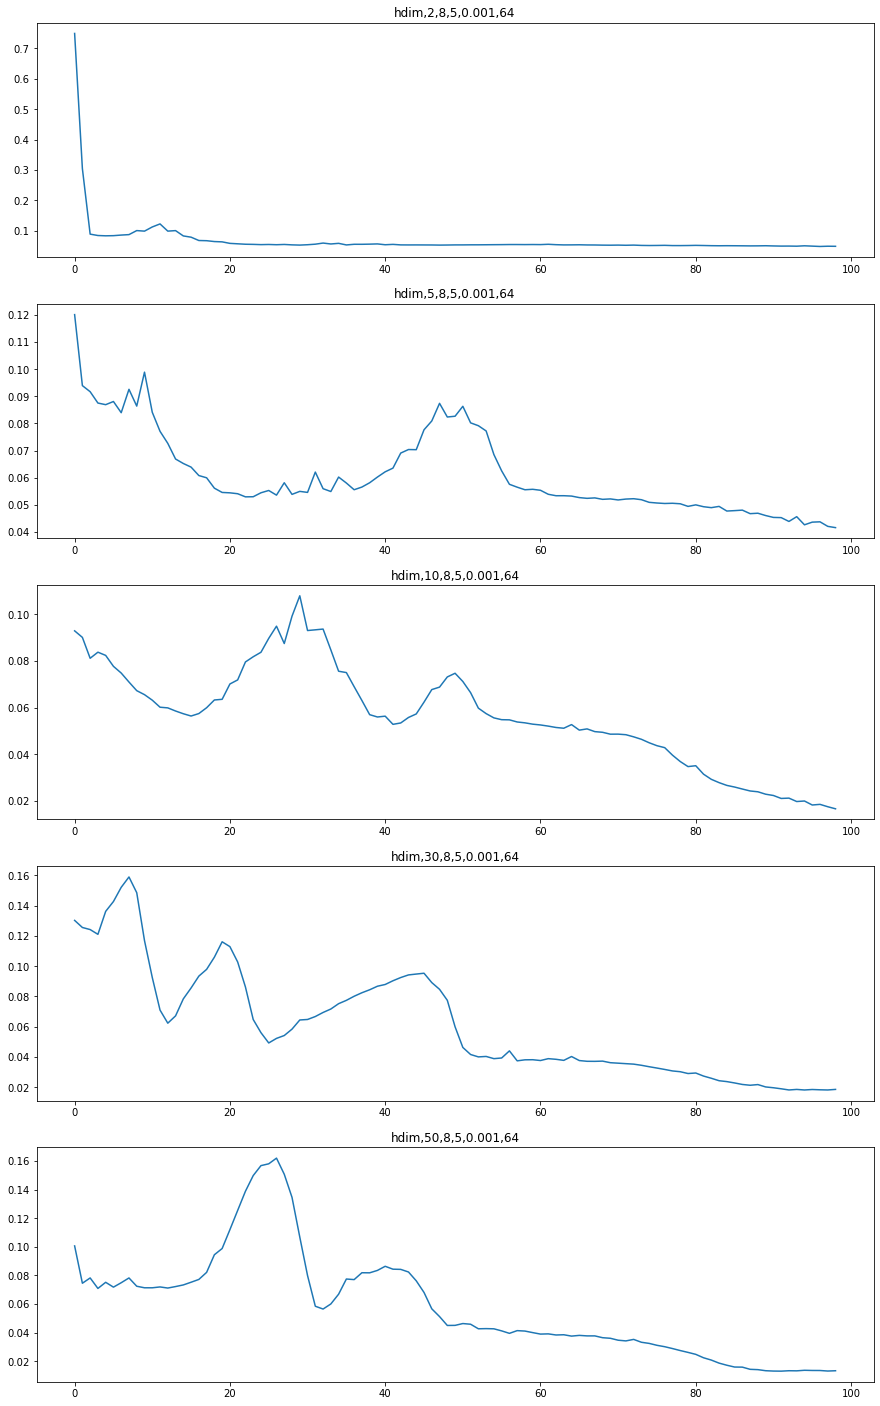

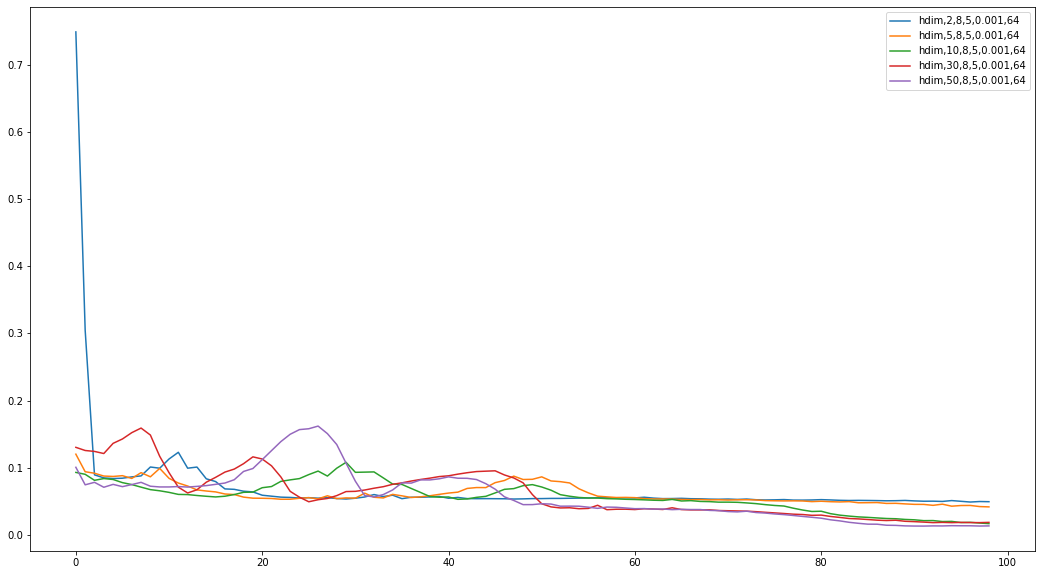

In [358]:
#indiquer quelles valeurs doivent rester fixe

#x.split(",")[1]=="2"

func=lambda x: x.split(",")[2]=="8" and True and x.split(",")[3]=="5"
selected_results_key=list(filter(func, list(liste_results.keys())[:-1]))
selected_results=[liste_results[key] for key in list(liste_results.keys())if key in selected_results_key]



fig,ax=plt.subplots(len(selected_results),figsize=[15,5*len(selected_results)])
for result,i in zip(selected_results,range(len(selected_results))):
    
    ax[i].plot(result["MAPE"])
    ax[i].set_title(f"{selected_results_key[i]}")
    
    #donne le round et le nombre de donnée necessaires pour atteindre cette valeur
    rounds_before_hitting_x(0.1 ,result,"MAPE",selected_results_key[i])
    
    

plt.figure(figsize=[18,10])
for result,i in zip(selected_results,range(len(selected_results))):
    plt.plot(result["MAPE"],label=f"{selected_results_key[i]}")
    plt.legend()